In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



In [ ]:
#1° Importar base de dados e 2° Visualizar

#Data/Hora (para intervalos de 10 minutos)
#LV ActivePower (kW): A potência gerada pela turbina naquele momento
#Velocidade do vento (m/s): A velocidade do vento na altura do cubo da turbina (a velocidade do vento que a turbina usa para geração de eletricidade)
#Theoretical_Power_Curve (KWh): Os valores de potência teórica que a turbina gera com aquela velocidade do vento que é fornecida pelo fabricante da turbina
#Direção do vento (°): A direção do vento na altura do cubo da turbina (as turbinas eólicas giram para esta direção automaticamente)
dados = pd.read_csv("T1.csv")
display(dados)
dados.info()

In [ ]:
# 3° Tratar os dados
dados.columns = ["Data/Hora", "Potência Ativa(kW)", "Velocidade(m/s)", "Curva Teorica(kWh)", "Direção(°)"]
dados = dados.drop(["Direção(°)"], axis=1)
display(dados)

In [13]:
dados['Data/Hora'] = pd.to_datetime(dados['Data/Hora'])
display(dados)

,Data/Hora,Potência Ativa(kW),Velocidade(m/s),Curva Teorica(kWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


Text(0.5, 1.0, 'Gráfico de Dispersão Valores Reais')

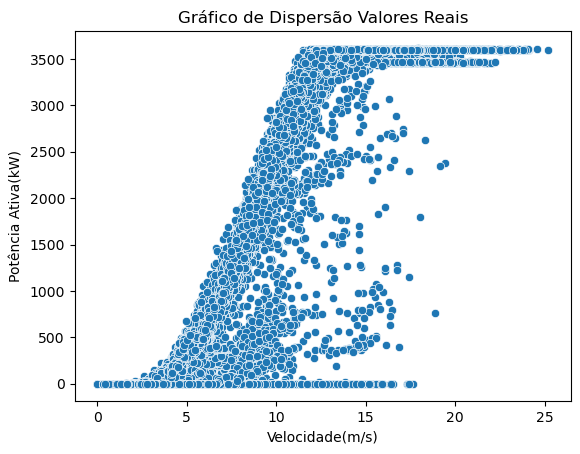

In [27]:
# Gráficos - de dispersão: scatterplot
sns.scatterplot(data=dados, x= 'Velocidade(m/s)', y= "Potência Ativa(kW)")
plt.title("Gráfico de Dispersão Valores Reais")

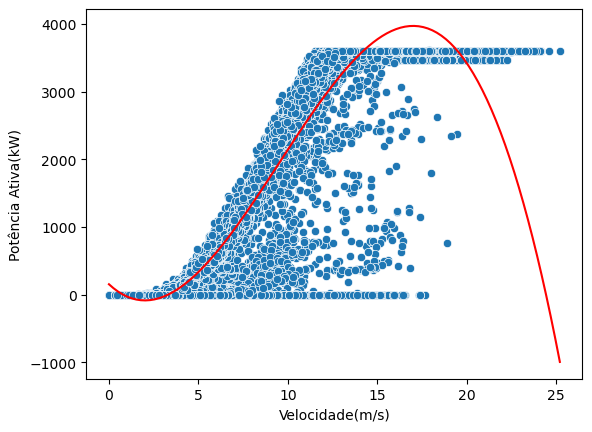

In [41]:
# sns.lmplot(data=dados, x='Velocidade(m/s)', y='Potência Ativa(kW)', ci=None)
# Obtendo os coeficientes do polinômio ajustados aos dados
coeffs = np.polyfit(dados['Velocidade(m/s)'], dados['Potência Ativa(kW)'], 3)
# Criando a função do polinômio com base nos coeficientes
polinomio = np.poly1d(coeffs)
# Criando uma série de pontos para plotar a curva de tendência
x_fit = np.linspace(min(dados['Velocidade(m/s)']), max(dados['Velocidade(m/s)']), 100)
y_fit = polinomio(x_fit)
# Plotando o gráfico de dispersão
sns.scatterplot(data=dados, x='Velocidade(m/s)', y='Potência Ativa(kW)')
# Plotando a curva de tendência
plt.plot(x_fit, y_fit, color='red', label=f'Curva de Tendência (grau {3})')

Text(0.5, 1.0, 'Curva Téorica')

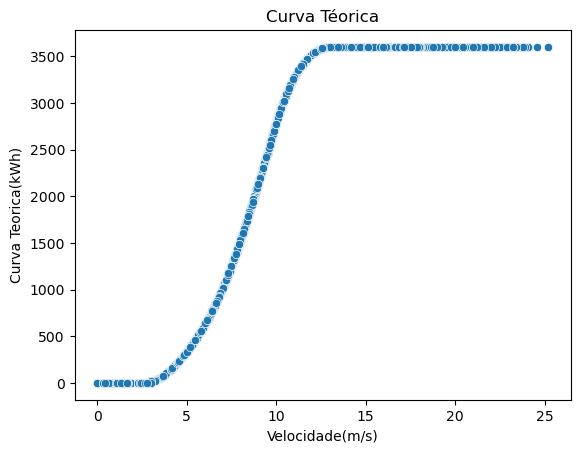

In [42]:
# Curva Téorica
sns.scatterplot(data=dados, x= 'Velocidade(m/s)', y= "Curva Teorica(kWh)")
plt.title("Curva Téorica")

In [64]:
# Criando limites - Dizer se ta ou não dentro do limite
pot_real = dados['Potência Ativa(kW)'].tolist()
pot_teorica = dados['Curva Teorica(kWh)'].tolist()
#display(pot_real, pot_teorica)
#ideal ter transformado em lista
pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)
#display(pot_max)

for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')    

print(dentro_limite.count('Dentro')/len(dentro_limite))
display(dentro_limite)


0.37286760340391845


['Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Dentro',
 'Dentro',
 'Dentro',
 'Dentro',
 'Dentro',
 'Dentro',
 'Fora',
 'Fora',
 'Dentro',
 'Dentro',
 'Dentro',
 'Fora',
 'Dentro',
 'Dentro',
 'Fora',
 'Fora',
 'Dentro',
 'Dentro',
 'Dentro',
 'Fora',
 'Dentro',
 'Dentro',
 'Dentro',
 'Dentro',
 'Dentro',
 'Dentro',
 'Fora',
 'Fora',
 'Dentro',
 'Dentro',
 'Fora',
 'Fora',
 'Dentro',
 'Dentro',
 'Dentro',
 'Dentro',
 'Dentro',
 'Dentro',
 'Dentro',
 'Fora',
 'Dentro',
 'Dentro',
 'Fora',
 'Fora',
 'Dentro',
 'Dentro',
 'Fora',
 'Dentro',
 'Dentro',
 'Fora',
 'Dentro',
 'Dentro',
 'Fora',
 'Fora',
 'Dentro',
 'Dentro',
 'Dentro',
 'Fora',
 'Dentro',
 'Fora',
 'Fora',
 'Fora',
 'Dentro',
 'Dentro',
 'Dentro',
 'Fora',
 'Fora',
 'Fora',
 'Dentro',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Dentro',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',
 'Fora',

In [65]:
dados['DentroLimite'] = dentro_limite
display(dados)

,Data/Hora,Potência Ativa(kW),Velocidade(m/s),Curva Teorica(kWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


Text(0.5, 1.0, 'Gráfico de Dispersão Valores Reais')

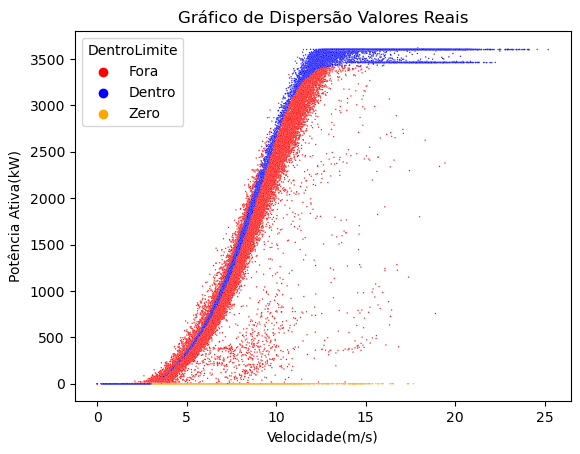

In [69]:
cores = {'Dentro':'blue', 'Fora':'red', 'Zero':'orange'}
sns.scatterplot(data=dados, x= 'Velocidade(m/s)', y= "Potência Ativa(kW)", hue= 'DentroLimite', s=1, palette=cores)
#hue: o que vai ser a base de separação
plt.title("Gráfico de Dispersão Valores Reais")